# Annual Premium charges prediction using linear regression

1. Domain and Business exploration
    - understanding the business process, common challenges
    - Understand possible data source, identify what are possible other data sources, how data is captured and stored, used
    - Understand mindset of stakeholders on the shopfloor, customer behavior from their lense
    - Explore the competitor markets, products and market size
    
    
2. data collection and data exploration
    - identify the relevant data sources, capture data
    - perform data warehousing, build a dataset
    - perform generic ETL to get right data, extract and dervice relevant columns
    - perform high level quality analysis and exploration on data
    
    
3. ETL and Data Cleaning
    - perform ETL to generate informative columns, convert/standardize data types
    - handle missing data
    - handle duplicated entries
    - handle outliers, unnatural data
    - handle unwanted columns
    
    
4. Feature Selection / Exploratory Data Analysis / Root Cause analytics
    - Statistical Research
        - correlation analysis
        - hypothesis testing: ANOVA, chi square
        - Mutual information
        - other feature selection techniques
        
    - Data visualization
        - univariate analysis
        - bivariate analysis
        - multivariate analysis
        
5. Preprocessng features
    - encoding
    - scaling / normalization
    - train test split
    
    
6. Apply Machine learning algorithms

7. Performance analysis

8. Optimization and tuning

9. Deploy the model to production

10. Monitor the performance in production


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data collection and exploration

In [3]:
#load data
df = pd.read_csv(r"D:\AI\data\datasets-1\insurance.csv")
df.shape

(1338, 7)

In [4]:
df.head()

,age,Gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include='object')

,Gender,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Analysis:
    
    - demographic info: age, gender, region
    - health: bmi, smoker
    
    - target: charges
    
    - charges may have some outliers

## 3. Data Cleaning

In [7]:
# check for missing values
df.isnull().sum()

age         0
Gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# check for duplicated entries
df.duplicated().sum()

1

In [10]:
# check duplicated row
df[df.duplicated(keep=False)]

,age,Gender,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
print(df.shape)
# dropping the duplicated entry, considering the first occurrence as original 
df.drop_duplicates(keep='first',inplace=True)
print(df.shape)

(1338, 7)
(1337, 7)


In [12]:
# check for outliers
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_27416/3256115495.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

    
    - if skewness > +1 = extreme high value outliers are present
    - if skewness < -1 = extreme low value outliers are present

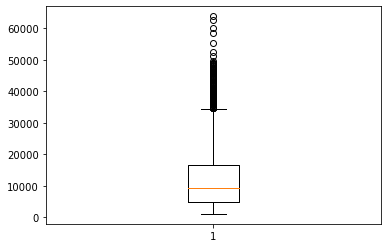

In [13]:
plt.boxplot(df.charges)
plt.show()

In [14]:
# clip all the values of charges above 50k to 50k
df.charges[df.charges>50000] = 50000
df.skew()

C:\Users\admin\AppData\Local\Temp/ipykernel_27416/2496499223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.charges[df.charges>50000] = 50000
C:\Users\admin\AppData\Local\Temp/ipykernel_27416/2496499223.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.454584
dtype: float64

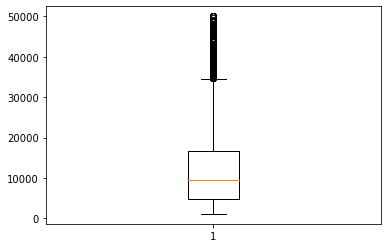

In [15]:
plt.boxplot(df.charges)
plt.show()

In [ ]:
## 4. Feature Selection
